# Fake News Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read the Datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data cleaning and preparation 

In [7]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'real'

In [8]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [9]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [10]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [11]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head()

,title,text,subject,date,target
0,GAFFE OF THE DAY: VA Gov. #TerryMcAuliffe Blam...,VIRGINIA governor Terry McAuliffe decided to g...,Government News,"Jun 14, 2017",fake
1,Putin's close friend: Donald Trump will be nex...,MOSCOW (Reuters) - One of Vladimir Putin’s clo...,politicsNews,"September 22, 2016",real
2,Ireland calls for realism from UK on border is...,DUBLIN (Reuters) - Much of the future border a...,worldnews,"August 28, 2017",real
3,THE TRUTH ABOUT WHY HILLARY Is The Only Candid...,This news should be enough to end Hillary s ob...,politics,"Apr 27, 2016",fake
4,Hamas picks new deputy chief whom Israel blame...,GAZA (Reuters) - The Palestinian Islamist grou...,worldnews,"October 5, 2017",real


In [13]:
# Removing the date ( as we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,GAFFE OF THE DAY: VA Gov. #TerryMcAuliffe Blam...,VIRGINIA governor Terry McAuliffe decided to g...,Government News,fake
1,Putin's close friend: Donald Trump will be nex...,MOSCOW (Reuters) - One of Vladimir Putin’s clo...,politicsNews,real
2,Ireland calls for realism from UK on border is...,DUBLIN (Reuters) - Much of the future border a...,worldnews,real
3,THE TRUTH ABOUT WHY HILLARY Is The Only Candid...,This news should be enough to end Hillary s ob...,politics,fake
4,Hamas picks new deputy chief whom Israel blame...,GAZA (Reuters) - The Palestinian Islamist grou...,worldnews,real


In [14]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())

data['title'] = data['title'].apply(lambda x: x.lower())
data.head()

,title,text,subject,target
0,gaffe of the day: va gov. #terrymcauliffe blam...,virginia governor terry mcauliffe decided to g...,Government News,fake
1,putin's close friend: donald trump will be nex...,moscow (reuters) - one of vladimir putin’s clo...,politicsNews,real
2,ireland calls for realism from uk on border is...,dublin (reuters) - much of the future border a...,worldnews,real
3,the truth about why hillary is the only candid...,this news should be enough to end hillary s ob...,politics,fake
4,hamas picks new deputy chief whom israel blame...,gaza (reuters) - the palestinian islamist grou...,worldnews,real


In [15]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data['title'] = data['title'].apply(punctuation_removal)

In [16]:
data.head()

,title,text,subject,target
0,gaffe of the day va gov terrymcauliffe blames ...,virginia governor terry mcauliffe decided to g...,Government News,fake
1,putins close friend donald trump will be next ...,moscow reuters one of vladimir putin’s closes...,politicsNews,real
2,ireland calls for realism from uk on border is...,dublin reuters much of the future border arra...,worldnews,real
3,the truth about why hillary is the only candid...,this news should be enough to end hillary s ob...,politics,fake
4,hamas picks new deputy chief whom israel blame...,gaza reuters the palestinian islamist group h...,worldnews,real


In [17]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pavilion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,title,text,subject,target
0,gaffe day va gov terrymcauliffe blames “too ma...,virginia governor terry mcauliffe decided get ...,Government News,fake
1,putins close friend donald trump next us presi...,moscow reuters one vladimir putin’s closest fr...,politicsNews,real
2,ireland calls realism uk border issue latest b...,dublin reuters much future border arrangements...,worldnews,real
3,truth hillary candidate travels fulltime physi...,news enough end hillary obsession becoming nex...,politics,fake
4,hamas picks new deputy chief israel blames hel...,gaza reuters palestinian islamist group hamas ...,worldnews,real


In [19]:
# Removing the title ( as we won't use it for the analysis)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,virginia governor terry mcauliffe decided get ...,Government News,fake
1,moscow reuters one vladimir putin’s closest fr...,politicsNews,real
2,dublin reuters much future border arrangements...,worldnews,real
3,news enough end hillary obsession becoming nex...,politics,fake
4,gaza reuters palestinian islamist group hamas ...,worldnews,real


## Data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


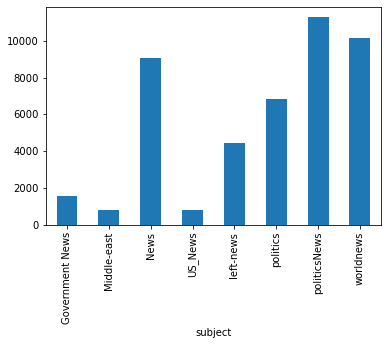

In [20]:
# Number of articles per subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
real    21417
Name: text, dtype: int64


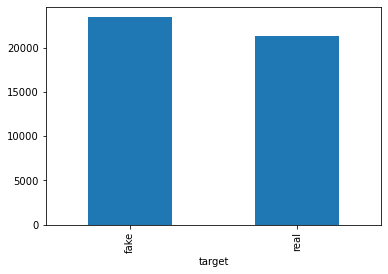

In [21]:
# Number of fake and real articles
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [22]:
!pip install wordcloud

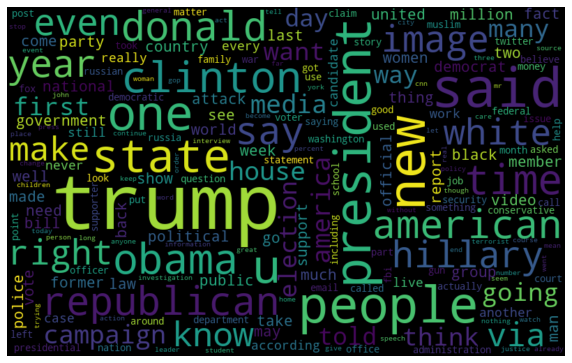

In [23]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

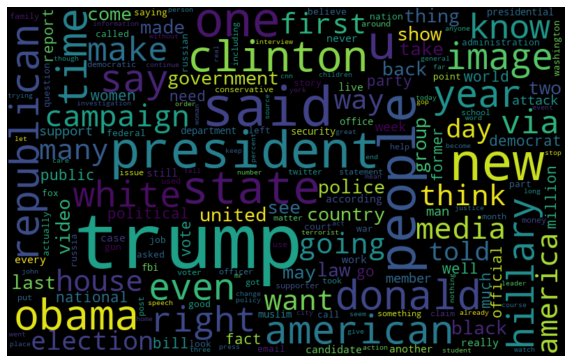

In [24]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [25]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

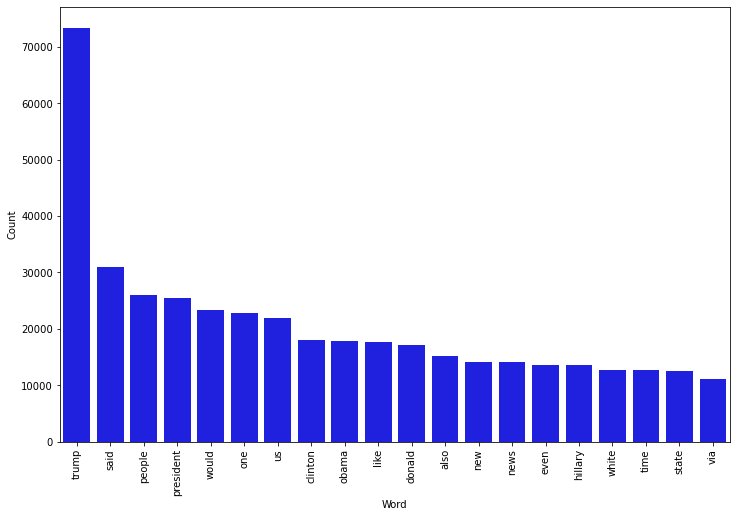

In [26]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

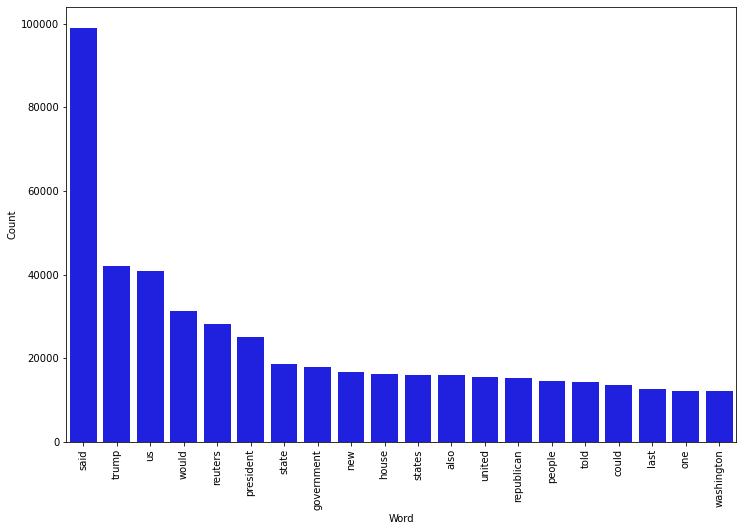

In [27]:
# Most frequent words in real news
counter(data[data["target"] == "real"], "text", 20)

## Modelling

In [28]:
#we introduce a self declared function in our code that can be called everytime we can to plot a confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Preparing the data - spliting the data 

In [29]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [30]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
LR_model = pipe.fit(X_train, y_train)

# Accuracy
prediction = LR_model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.06%


Confusion matrix, without normalization


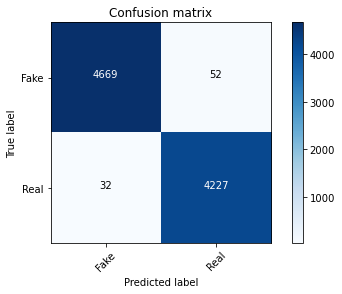

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### 2. Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
DT_model = pipe.fit(X_train, y_train)

# Accuracy
prediction = DT_model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.67%


Confusion matrix, without normalization


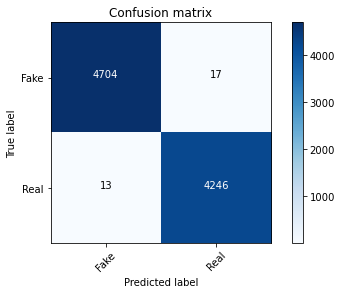

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### 3. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

RF_model = pipe.fit(X_train, y_train)
prediction = RF_model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.08%


Confusion matrix, without normalization


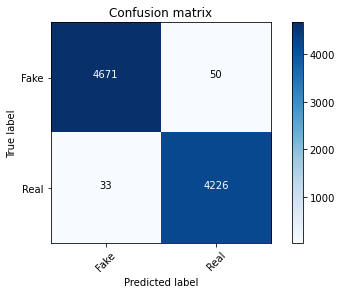

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### 4. Passive Aggressive Classifier

In [36]:
# building Passive Aggressive Classifier 
# Applying Passive Aggressive Classifier

# Initialize a PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', PassiveAggressiveClassifier(max_iter=50))])
# Fitting the model
PA_model = pipe.fit(X_train, y_train)

# Accuracy
prediction = PA_model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.7%


Confusion matrix, without normalization


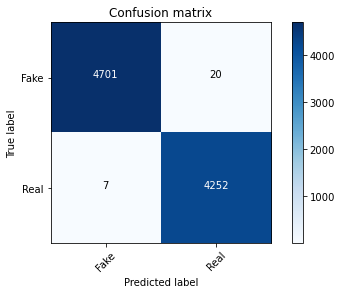

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [39]:
import pickle

In [40]:
# saving best model to the disk

model_file = 'final_model.sav'
pickle.dump(RF_model,open(model_file,'wb'))

In [41]:
import pickle
var = input("Please enter the news text you want to verify:")

# function to run for prediction
def detecting_fake_news(var):  
    
    #retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])

    return (print("\nThe given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify:jdhh

The given statement is  FAKE
